# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

**n_estimators** determines the number of trees in the random forest. The concept of random forest is to average across many trees with high variance to improve generalizability and reduce overfitting, and the more trees, the better the performance of the random forest classifier at the expense of an increased computational cost.

**max_depth:** determines the depth of the individual trees allowed in order to partition the data. This is set to control the complexity of the model. If set to "none" the data will be partitioned until nodes are pure. This of course implies better model performance at the cost of higher computational cost. 

**Max_features:** determines the number of features to be considered when making a split. The higher number of features considered at each split increases computational cost, but increases the likelihood that the relevant features are considered. If the max_features is set low and the data set includes many features there is a higher risk of missing important features. Again, this is a trade-off between model performance and computational cost. 

**Bootstrap:** specifies whether subsamples of each tree is drawn with replacement or not. If bootstrap is set to false the whole data set will be used for building each tree. But the idea in the random forest is to take the average across many different trees, so bootstrap is key part of this process in order to. Bootstrap is used to resample data to reduce effect of outliers - because they will occur less frequently in the resampled data. 

Rashcka also talks about the sample size of the bootstrap: Via the sample size n of the bootstrap sample, we control the bias-variance tradeoff of the random forest. Decreasing the size of the bootstrap sample increases the diversity among the individual trees, since the probability that a particular training sample is included in the bootstrap sample is lower. Thus, shrinking the size of the bootstrap samples may increase the randomness of the random forest, and it can help to reduce the effect of overfitting. However, smaller bootstrap samples typically result in a lower overall performance of the random forest, a small gap between training and test performance, but a low test performance overall. Conversely, increasing the size of the bootstrap sample may increase the degree of overfitting. Because the bootstrap samples, and consequently the individual decision trees, become more similar to each other, they learn to fit the original training dataset more closely.

However, the sample size of the bootstrap does not seem to be a part of te sklearn.ensemble.RandomForestClassifier?

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

In order to make all the trees identical we set:

**max_features = n_features**: This implies looking at all features in the sample

**bootstrap = False**: This implies as described above that the whole dataset is used when sampling each tree.

This way every tree will be build using the same data and considering the same features and will turn out identical.

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

In [1]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from umap import UMAP
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

In [11]:
def plotDimensionReducer(reducer, X, y, ax):
    ssc = StandardScaler()
    X_std =ssc.fit_transform(X)
    
    if reducer == LDA:
        dmap = reducer().fit_transform(X_std,y)
    else: 
        dmap = reducer().fit_transform(X_std)
        
    d1, d2 = dmap[:,0], dmap[:,1]
    
    sct = ax.scatter(d1,d2, c=y) #cmap = 'spring'
    ax.set_title(reducer.__name__)

C:\Users\Oliver\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


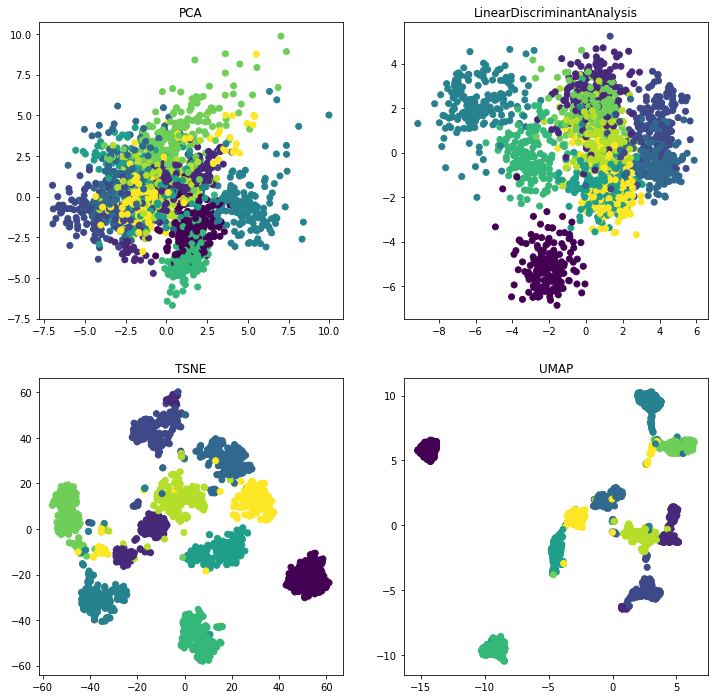

In [12]:
fix, ax = plt.subplots(2,2, figsize =(12,12))

plotDimensionReducer(PCA, X_digits, y_digits, ax[0][0])
plotDimensionReducer(LDA, X_digits, y_digits, ax[0][1])
plotDimensionReducer(TSNE, X_digits, y_digits, ax[1][0])
plotDimensionReducer(UMAP, X_digits, y_digits, ax[1][1])

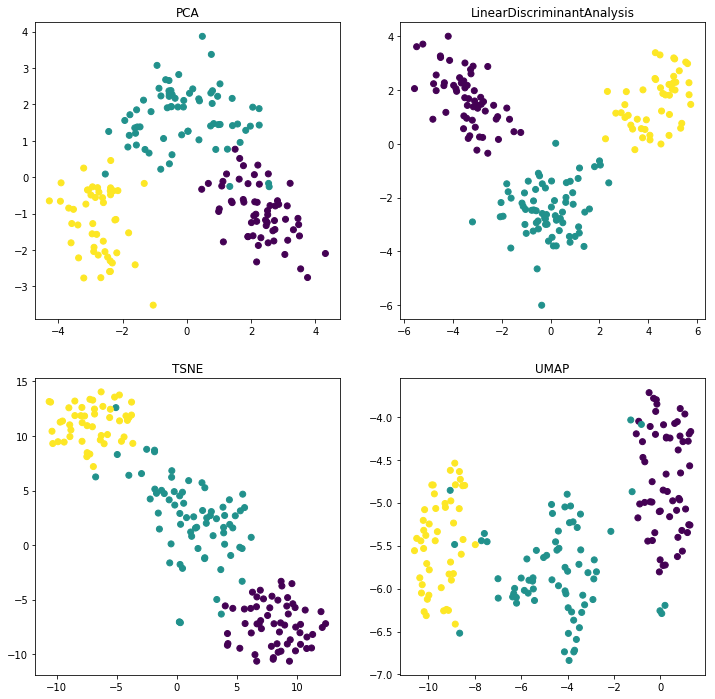

In [13]:
fix, ax = plt.subplots(2,2, figsize =(12,12))

plotDimensionReducer(PCA, X_wine, y_wine, ax[0][0])
plotDimensionReducer(LDA, X_wine, y_wine, ax[0][1])
plotDimensionReducer(TSNE, X_wine, y_wine, ax[1][0])
plotDimensionReducer(UMAP, X_wine, y_wine, ax[1][1])

In [14]:
def plotDimensionReducer_no_std(reducer, X, y, ax):
    
    if reducer == LDA:
        dmap = reducer().fit_transform(X,y)
    else: 
        dmap = reducer().fit_transform(X)
        
    d1, d2 = dmap[:,0], dmap[:,1]
    
    sct = ax.scatter(d1,d2, c=y) #cmap = 'spring'
    ax.set_title(reducer.__name__)

C:\Users\Oliver\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


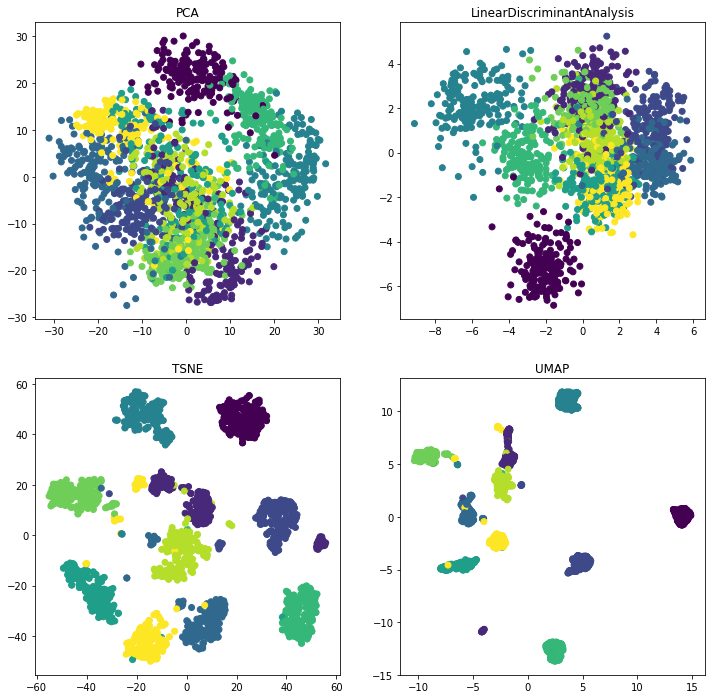

In [15]:
fix, ax = plt.subplots(2,2, figsize =(12,12))

plotDimensionReducer_no_std(PCA, X_digits, y_digits, ax[0][0])
plotDimensionReducer_no_std(LDA, X_digits, y_digits, ax[0][1])
plotDimensionReducer_no_std(TSNE, X_digits, y_digits, ax[1][0])
plotDimensionReducer_no_std(UMAP, X_digits, y_digits, ax[1][1])

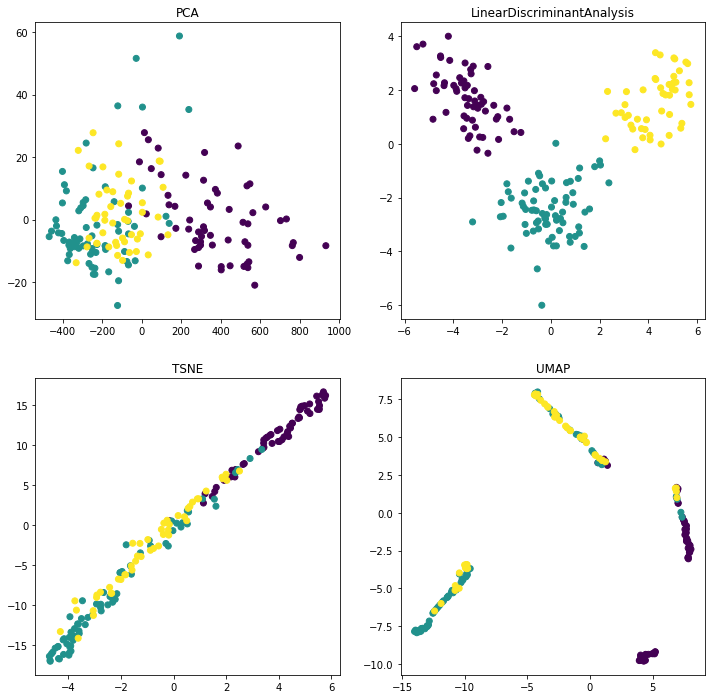

In [16]:
fix, ax = plt.subplots(2,2, figsize =(12,12))

plotDimensionReducer_no_std(PCA, X_wine, y_wine, ax[0][0])
plotDimensionReducer_no_std(LDA, X_wine, y_wine, ax[0][1])
plotDimensionReducer_no_std(TSNE, X_wine, y_wine, ax[1][0])
plotDimensionReducer_no_std(UMAP, X_wine, y_wine, ax[1][1])

**3.1.2.2**: Standardizing is important because different variables may be measured very differently, and accordingly when comparing distances between observation this measure will be affected by this variance. Standardizing ensures we compare variables in the same manner. 

In the two different datasets we see that the result of the analysis 'digits' is not affected as much by the lack of standardizing as the 'wine'. Looking at the figure for non-standardized wine PCA, only LDA seems to be working. In the wine data set there are many different variables measured on different scales, which means high variance variables will ruin the results in the principal componant analysis. The digits data is measred in the same way, so the units are comparable. All the features are transformations of the pixel data into integer values between 0 and 16, so features are all comparable when doing PCA. 

In [74]:
# I tried to look at the unique values in X_digits to be certain everything was in the range 0-16
save_set_digits = set()
save_set_wine = set()

for i in range(len(list(X_digits))):
    for n in X_digits[i]:
        save_set_digits.add(n)
        
for i in range(len(list(X_wine))):
    for n in X_wine[i]:
        save_set_wine.add(n)
# We see that the features in digits is integers from 0-16
print(save_set_digits)
# Where as the features in wine-data has 810 unique values and there is not the same comparability as in digits
print(len(save_set_wine))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0}
810


**3.1.2.3**: 
In the digits data the PCA and LDA does not perform very well, whereas t-SNE and UMAP does a much better job of separating the classes. A key difference in performs between PCA and LDA versus t-SNE and UMAP could be due to non-linearities in the relationships in the digits data. 

In the wine data none of the methods seem superior; every method seem to separate the classses equally, so in this case all the methods seem to be applicable. 

In both the wine and the digits data the LDA seem to be better of the two linear methods, as it seem to better show how separable the classes are, but this method requires knowledge of the classes since it is a supervised learning process. So where it seems to outperform PCA, it does also have more requirements. 

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

A tree is honest in the sense of Athey and Imbens when half of the sample is used for training decision tree partitions and the other half for estimating treatment effects. This prevents data leakage and allows honest evaluation of model performance, rather than estimating on the same data that the model was trained on. 

The splitting of the data works like coarsened matching. This means the average treatment effects are estimated locally at each leaf. This approach will outperform the conventional adaptive (CART) approach.

In the practical implementation of the Decision Tree algorithm this means: 

We make the usual steps of:

- Splitting leaves repeatedly based on a criteria (e.g. MSE or entropy)
- Choosing hyperparameters

then the new steps are:

1) Half of sample ($\mathcal{S}^{tr}$) is used for training: 
- partitions X into categories based outcome similarity
- apply new criteria: expected MSE (in hypothetical test set): $\mathbb{E}[\underset{=MSE}{\underbrace{(Y_i-\bar{Y}_i)^2}} - Y_i^2]$ 
- Idea: new term $Y_i^2$ penalizes small leaves so that we end up with leaves that have enough treatment and control in each leaf


2) Other half ($\mathcal{S}^{est}$) for estimating treatment effects, that is to measure treatment effects in each partition group (=leaf in tree model)